# Sistemas de recomendaciones
---
RIIAA 2019


Andong Luis Li Zhao


Las metas de este mini curso son:
*  Aprender cómo utilizar aprendizaje de máquina en sistemas de recomendaciones
*  Implementar e utilizar técnicas comunes en sistemas de recomendaciones
*  Usar Python y pandas para manipular datos e implementar algoritmos
*  Explorar el panorama general de problemas en sistemas de recomendaciones 


## Repaso: Aprendizaje de máquina




In [1]:
# Obtener base de datos
import pandas as pd

iris = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')

print(iris.shape)
print(iris.head())

(150, 5)
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [2]:
# Creación de datos para entrenamiento y para evaluación
from sklearn.model_selection import train_test_split

y = iris["species"]
X = iris.drop("species", axis=1)

trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.25)

print(trainX.shape)
print(testX.shape)
print(trainY.shape)
print(testY.shape)


(112, 4)
(38, 4)
(112,)
(38,)


In [3]:
# Creación y entrenamiento de modelo

from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()

clf.fit(trainX, trainY)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [4]:
# Evaluación de modelo
from sklearn import metrics

train_pred = clf.predict(trainX)
test_pred = clf.predict(testX)
print(f"Train accuracy score: {metrics.accuracy_score(trainY, train_pred)}")
print(f"Test accuracy score: {metrics.accuracy_score(testY, test_pred)}")

print("Train Confusion Matrix")
print(metrics.confusion_matrix(trainY, train_pred))
print("Test Confusion Matrix")
print(metrics.confusion_matrix(testY, test_pred))

Train accuracy score: 1.0
Test accuracy score: 0.9736842105263158
Train Confusion Matrix
[[36  0  0]
 [ 0 39  0]
 [ 0  0 37]]
Test Confusion Matrix
[[14  0  0]
 [ 0 10  1]
 [ 0  0 13]]


In [10]:
# Validación cruzada

from sklearn.model_selection import cross_val_score

cv_results = cross_val_score(clf, trainX, trainY, cv=3, scoring="accuracy")
print(cv_results)

[0.92105263 0.97368421 0.94444444]


## Repaso: Álgebra lineal

In [11]:
# Matrices
import numpy as np

A = np.random.randint(0, 10, size=(3,5))
print(A)
print(A.shape)

[[9 1 7 5 0]
 [6 9 5 4 9]
 [9 3 5 5 5]]
(3, 5)


In [12]:
# Accesar elementos de matrices en numpy
print(A[0])
print(A[0,1])
print(A[:, 1])
print(A[0, :])

[9 1 7 5 0]
1
[1 9 3]
[9 1 7 5 0]


In [13]:
# Matriz transpuesta
print(A.T)
print(A.T.shape)

[[9 6 9]
 [1 9 3]
 [7 5 5]
 [5 4 5]
 [0 9 5]]
(5, 3)


In [14]:


B = np.random.randint(0, 10, size=(5,5))
print(B)
print(A.shape)
print(B.shape)

[[3 1 4 9 0]
 [2 1 1 6 8]
 [8 8 4 3 3]
 [6 1 6 6 2]
 [5 1 8 2 9]]
(3, 5)
(5, 5)


In [15]:
# Producto de Matrices
print(A @ B)

[[115  71  95 138  39]
 [145  68 149 165 176]
 [128  62 129 154  94]]


In [16]:
# Producto de Matrices
print(B @ A)

ValueError: ignored

In [17]:
# Producto de Matrices
print(B @ A.T)

[[101  83  95]
 [ 56 122  96]
 [123 179 146]
 [127 117 127]
 [112 168 143]]


In [18]:
# Rango

print(np.linalg.matrix_rank(A))
print(np.linalg.matrix_rank(A.T))
print(np.linalg.matrix_rank(B))
print(np.linalg.matrix_rank(B.T))

3
3
5
5


## Procesamiento de datos

In [5]:
# Obtener la base de datos (subir archivos desde tu computadora)
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  

Saving genres.csv to genres.csv
Saving ratings.csv to ratings.csv
User uploaded file "genres.csv" with length 110628 bytes
User uploaded file "ratings.csv" with length 1462244 bytes


In [0]:
# Leer los datos
from io import StringIO
import pandas as pd

# Ratings/valoraciones
s=str(uploaded["ratings.csv"],'utf-8')
data = StringIO(s) 
r_df = pd.read_csv(data)
r_df = r_df.sample(frac=1, random_state=43)

# Géneros
s=str(uploaded["genres.csv"],'utf-8')
data = StringIO(s) 
g_df = pd.read_csv(data)





In [22]:
# Imprimir algunos datos

print(r_df.shape)
print(list(r_df))
print(r_df.head())

print(g_df.shape)
print(list(g_df))
print(g_df.head())

(59706, 4)
['userId', 'movieId', 'rating', 'timestamp']
       userId  movieId  rating   timestamp
29107      68      180     2.5  1269121607
27174     177     1033     3.5  1435535976
31176     599     1674     2.5  1498518276
8002      217     1254     3.0   955941875
57546      19     1690     1.0   965703885
(2120, 3)
['movieId', 'title', 'genres']
   movieId  ...                                       genres
0        1  ...  Adventure|Animation|Children|Comedy|Fantasy
1        2  ...                   Adventure|Children|Fantasy
2        3  ...                               Comedy|Romance
3        5  ...                                       Comedy
4        6  ...                        Action|Crime|Thriller

[5 rows x 3 columns]


In [7]:
# Separar en datos de entrenamiento y validación
split_ind = 9 * r_df.shape[0] // 10

test_df = r_df.iloc[split_ind:, :]
r_df = r_df.iloc[0:split_ind, :]

print(test_df.shape)
print(r_df.shape)

(5971, 4)
(53735, 4)


## k Nearest Neighbors


In [0]:
# Obtener datos que se usaran
r_df = r_df # No hace nada esta linea, nada mas para señalar qué datos usamos
test_df = test_df

In [25]:
# Hacer matriz de usuarios y películas

ui_matrix = r_df.pivot(index='userId', columns='movieId', values='rating')

print(test_df.shape)
print(r_df.shape)
print(ui_matrix.shape)

(5971, 4)
(53735, 4)
(608, 2120)


In [0]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import cosine


def jaccard_simil(ratings_1, ratings_2):
    # Input: two 1D arrays, same length. No NaNs, 
    #        but 0's indicate no rating
    # Output: Jaccard similarity
    
    # TODO: Calcula la similitud de jaccard
    bool_1 = ratings_1 != 0
    bool_2 = ratings_2 != 0
    inter = np.sum(bool_1 & bool_2)
    union = np.sum(bool_1) + np.sum(bool_2) - inter
    return inter / union


def cosine_simil(ratings_1, ratings_2):
    # Input: two 1D arrays, same length. With NaN's
    # Output: Jaccard similarity
    
    # TODO: Calcula la similitud de coseno con función cosine() importada
    return 1 - cosine(ratings_1, ratings_2)

# Clase principal para predicción con kNN
class KnnClass():


    def __init__(self, min_val, max_val, k=5, similarity="pearson"):

        simils = ["pearson", "cosine", "jaccard"]
        if similarity not in simils:
            raise ValueError('Error: similitud invalida, debe ser ["pearson", "cosine", "jaccard"]')

        self.similarity = similarity
        self.k = k
        self.means = pd.Series()
        self.ratings = pd.DataFrame()
        self.similarities = pd.DataFrame()
        self.min_val = min_val
        self.max_val = max_val


    def fit(self, df):
        # df es DataFrame donde cada fila es un usuario y cada columna es una película
        # Los valores de la celda indican la valoración de ese usuario sobre esa película
        # Hay valores NaN si la valoración no existe
        
        # Guardar valoraciones para las predicciones
        self.ratings = df

        # Calcular promedios
        self.means = self.ratings.mean(axis=1, skipna=True)

        # Calcular similitudes
        if self.similarity == "pearson":
            self.similarities = self.ratings.T.corr(method="pearson")

        elif self.similarity == "jaccard":
            # Aquí convertimos de NaN's a 0's porque la función jaccard_simil
            # asume eso. Esto es necesario para que .corr() calcule la similitud
            # correctamente
            self.similarities = self.ratings.T.fillna(0).corr(method=jaccard_simil)

        elif self.similarity == "cosine":
            self.similarities = self.ratings.T.corr(method=cosine_simil)


    def _prior(self, user_id, item_id):
        # Predicción si user_id y/o item_id son nuevos en el sistema
        if user_id not in self.ratings.index:
            if item_id not in list(self.ratings):
                # Si ambos son nuevos, regresa punto medio
                return (self.min_val + self.max_val) / 2
            else:
                # Si usuario es nuevo, regresa promedio de la película
                return self.ratings[item_id].mean(skipna=True)
        else:
            # Si la película es nueva, regresa promedio del usuario
            return self.ratings.loc[user_id, :].mean(skipna=True)



    def predict(self, user_id, item_id, round_pred=False):

        # Checar si usuario/película es nueva
        if user_id not in self.ratings.index or item_id not in self.ratings:
            pred =  self._prior(user_id, item_id)

        else:

            # TODO: Obten similitudes para usuario que han valorado item_id
            raters = self.ratings[~ self.ratings[item_id].isnull()].index
            simils = self.similarities.loc[user_id, raters]

            # TODO: Ordena similitudes en orden descendiente
            simils = simils.sort_values(ascending=False)

            # TODO: Obten los k usuarios con similitudes a user_id más grandes 
            inds = simils.nlargest(min(self.k, len(simils))).index

            # Calcular predicción
            if simils[inds].sum() != 0:
                # TODO: Calcula predicción
                pred = self.means[user_id] + (self.ratings.loc[inds, item_id] - self.means.loc[inds] ).sum() / (simils[inds].sum())
            else:
                # TODO: Calcula predicción cuando la suma de abajo es igual a 0
                
                pred = self.means[user_id] + (self.ratings.loc[inds, item_id] - self.means.loc[inds] ).sum() / 0.00001

            # Truncate just in case
            # Asegurate que la predicción esté entre max_val y min_val
            pred = max(min(pred, self.max_val), self.min_val)

        # Devuelve la predicción (redondeada si es que es necesario)
        if round_pred:
            return round(pred, 1)
        else:
            return pred


In [0]:
# Unit tests para coeficiente Pearson (todo debería de pasar, ya estaba implementada)

# Test 1
knn = KnnClass(min_val=1.0, max_val=5.0, k=20, similarity="pearson")
knn.fit(ui_matrix)
val = knn.similarities.loc[1, 1]
assert val == 1.0, f"Test 1: val debería ser 1.0, en vez de {val}"

# Test 2
val = knn.similarities.loc[1, 4]
assert val == 0.48723001369349506, f"Test 2: val debería ser 0.48723001369349506, en vez de {val}"

# Test 3
val = knn.similarities.loc[2, 2]
assert val == 1.0, f"Test 3: val debería ser 1.0, en vez de {val}"

# Test 4
val = knn.similarities.loc[2, 550]
assert val == -0.6071428571428572, f"Test 4: val debería ser -0.6071428571428572, en vez de {val}"


In [0]:
# Unit tests para similaridades: Coseno

# Test 1
knn = KnnClass(min_val=1.0, max_val=5.0, k=20, similarity="cosine")
knn.fit(ui_matrix)
val = knn.similarities.loc[1, 1]
assert val == 1.0, f"Test 1: val debería ser 1.0, en vez de {val}"

# Test 2
val = knn.similarities.loc[1, 4]
assert val == 0.9424549558857006, f"Test 2: val debería ser 0.9424549558857006, en vez de {val}"

# Test 3
val = knn.similarities.loc[2, 2]
assert val == 1.0, f"Test 3: val debería ser 1.0, en vez de {val}"

# Test 4
val = knn.similarities.loc[2, 550]
assert val == 0.9671696756264027, f"Test 4: val debería ser 0.9671696756264027, en vez de {val}"


In [0]:
# Unit tests para similaridades: Jaccard

# Test 1
knn = KnnClass(min_val=1.0, max_val=5.0, k=20, similarity="jaccard")
knn.fit(ui_matrix)
val = knn.similarities.loc[1, 1]
assert val == 1.0, f"Test 1: val debería ser 1.0, en vez de {val}"

# Test 2
val = knn.similarities.loc[1, 4]
assert val == 0.08189655172413793, f"Test 2: val debería ser 1.0, en vez de {val}"

# Test 3
val = knn.similarities.loc[2, 2]
assert val == 1.0, f"Test 3: val debería ser 1.0, en vez de {val}"

# Test 4
val = knn.similarities.loc[2, 550]
assert val == 0.17857142857142858, f"Test 4: val debería ser 1.0, en vez de {val}"

In [0]:
# Unit test para predict
# Si tienes los siguientes resultados, entonces probablemente está correcta tu implementación

# Test 1
knn = KnnClass(min_val=1.0, max_val=5.0, k=20, similarity="pearson")
knn.fit(ui_matrix)
pred = knn.predict(user_id=1, item_id=1, round_pred=True)
assert pred == 4.7, f"Test 1: pred debería ser 4.7, en vez de {pred}"

# Test 2
pred = knn.predict(user_id=2, item_id=5, round_pred=True)
assert pred == 5.0, f"Test 2: pred debería ser 5.0, en vez de {pred}"

# Test 3
knn = KnnClass(min_val=1.0, max_val=5.0, k=5, similarity="cosine")
knn.fit(ui_matrix)
pred = knn.predict(user_id=1, item_id=1, round_pred=True)
assert pred == 4.2, f"Test 3 Error: pred debería ser 4.2, en vez de {pred}"

# Test 4
knn = KnnClass(min_val=1.0, max_val=5.0, k=10, similarity="jaccard")
knn.fit(ui_matrix)
pred = knn.predict(user_id=1, item_id=1, round_pred=True)
assert pred == 5.0, f"Test 4 Error: pred debería ser 5.0, en vez de {pred}"

# Test 5
pred = knn.predict(user_id=2, item_id=5, round_pred=True)
assert pred == 1.0, f"Test 5 Error: pred debería ser 1.0, en vez de {pred}"


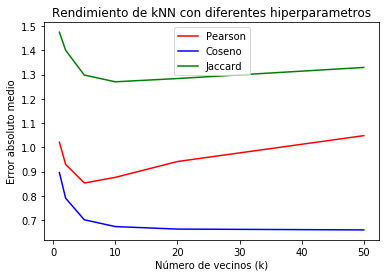

<Figure size 432x288 with 0 Axes>

In [60]:
# Hacer grafica de diferentes ks

%matplotlib inline

from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt


ks = [1, 2, 5, 10, 20, 50]
res_pearson = [0] * len(ks)
res_cosine = [0] * len(ks)
res_jaccard = [0] * len(ks)

results = [res_pearson, res_cosine, res_jaccard]

for i, k in enumerate(ks):
  for j, simil in enumerate(["pearson", "cosine", "jaccard"]):
    knn = KnnClass(min_val=1.0, max_val=5.0, k=k, similarity=simil)
    knn.fit(ui_matrix)

    predictions= test_df.apply(lambda x: knn.predict(user_id=x["userId"], item_id=x["movieId"], round_pred=True), axis=1)

    mae = mean_absolute_error(test_df["rating"], predictions)
    
    results[j][i] = mae
    
    


plt.figure()
plt.plot(ks, res_pearson, color='r', label='Pearson')
plt.plot(ks, res_cosine, color='b', label='Coseno')
plt.plot(ks, res_jaccard, color='g', label='Jaccard')
plt.xlabel("Número de vecinos (k)")
plt.ylabel("Error absoluto medio")
plt.legend()
plt.title("Rendimiento de kNN con diferentes hiperparametros")
plt.show()
plt.clf()



## Factorización de matrices


In [61]:
# Obtener datos que se usaran 

# No hacen nada estas lineas, nada más son para señalar qué datos usamos
r_df = r_df
ui_matrix = ui_matrix
test_df = test_df


print(test_df.shape)
print(r_df.shape)
print(ui_matrix.shape)

(5971, 4)
(53735, 4)
(608, 2120)


In [0]:
# Clase principal para el modelo SVD


class SVDClass():

    def __init__(self, min_val, max_val, r=100, ):

        self.r = r
        self.ratings = pd.DataFrame()
        self.predictions = pd.DataFrame()
        self.min_val = min_val
        self.max_val = max_val


    def fit(self, df):

        # Guardar valoraciones para _prior()
        self.ratings = df

        # TODO: Reemplaza NaN's con 0's
        Y = np.nan_to_num(df.values)

        # Calcular U, s, VT con np.linalg.svd
        # NOTA: s es un vector de valores singulares
        # s ya esta en orden descendiente
        U, s, VT = np.linalg.svd(Y)

        # TODO: Conserva solo los r valores singulares más grandes de s
        if self.r < s.shape[0]:
            s[self.r:] = 0

        # TODO: Crea la matriz diagonal S con dimensiones correctas
        S = np.zeros(Y.shape)
        S[:Y.shape[0], :Y.shape[0]] = np.diag(s)

        # TODO: Calcula la aproximación de y
        Y_hat = U @ S @ VT

        # Crear un DataFrame en base a la aproximación
        self.predictions = pd.DataFrame(data=Y_hat,
                                        index=df.index,
                                        columns=list(df))

    def _prior(self, user_id, item_id):
        # Predicción si user_id y/o item_id son nuevos en el sistema
        if user_id not in self.ratings.index:
            if item_id not in list(self.ratings):
                return (self.min_val + self.max_val) / 2
            else:
                return self.ratings[item_id].mean(skipna=True)
        else:
            return self.ratings.loc[user_id, :].mean(skipna=True)



    def predict(self, user_id, item_id, round_pred=True):

        # Checar si es un nuevo usuario o nueva película
        if user_id not in self.ratings.index or item_id not in self.ratings:
            pred =  self._prior(user_id, item_id)
        else:
            # TODO: Predice la valoración de user_id sobre item_id
            pred = self.predictions.loc[user_id, item_id]

            # TODO: Asegurate que la predicción este entre min_val y max_val
            pred = max(min(pred, self.max_val), self.min_val)           

        # Redonde la predicción y devuelvela
        if round_pred:
            return round(pred, 1)
        else:
            return pred

In [0]:
# Unit test para cada funcion

svd_model = SVDClass(min_val=1.0, max_val=5.0, r=1,)
svd_model.fit(ui_matrix)
# Test 1
pred = svd_model.predict(user_id=1, item_id=1, round_pred=True)
assert pred == 1.3, f"Test 1 Error: pred debería ser 1.3, en vez de {pred}"

# Test 2
pred = svd_model.predict(user_id=2, item_id=5, round_pred=True)
assert pred == 1.0, f"Test 2 Error: pred debería ser 1.0, en vez de {pred}"


svd_model = SVDClass(min_val=1.0, max_val=5.0, r=10,)
svd_model.fit(ui_matrix)

# Test 3
pred = svd_model.predict(user_id=1, item_id=1, round_pred=True)
assert pred == 2.2, f"Test 3 Error: pred debería ser 2.2, en vez de {pred}"

# Test 4
pred = svd_model.predict(user_id=2, item_id=5, round_pred=True)
assert pred == 1.0, f"Test 4 Error: pred debería ser 1.0, en vez de {pred}"


svd_model = SVDClass(min_val=1.0, max_val=5.0, r=40,)
svd_model.fit(ui_matrix)

# Test 5
pred = svd_model.predict(user_id=1, item_id=1, round_pred=True)
assert pred == 2.8, f"Test 5 Error: pred debería ser 2.8, en vez de {pred}"

# Test 6
pred = svd_model.predict(user_id=2, item_id=5, round_pred=True)
assert pred == 1.0, f"Test 6 Error: pred debería ser 1.0, en vez de {pred}"

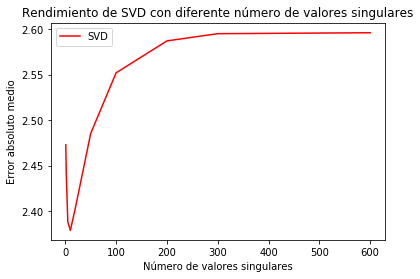

In [68]:
# Hacer grafica de diferentes ks

rs = [1, 2, 5, 10, 20, 50, 100, 200, 300, 600]
results = [0] * len(rs)

for i, r in enumerate(rs):
    svd_model = SVDClass(min_val=1.0, max_val=5.0, r=r,)
    svd_model.fit(ui_matrix)

    predictions= test_df.apply(lambda x: svd_model.predict(user_id=x["userId"], item_id=x["movieId"], round_pred=True), axis=1)

    mae = mean_absolute_error(test_df["rating"], predictions)
    
    results[i] = mae
    
plt.figure()
plt.plot(rs, results, color='r', label='SVD')
plt.xlabel("Número de valores singulares")
plt.ylabel("Error absoluto medio")
plt.legend()
plt.title("Rendimiento de SVD con diferente número de valores singulares")
plt.show()


## Ingeniería de características

In [0]:
# Obtener datos que se usaran y poner en formato adecuado

# No hacen nada estas lineas, nada más son para señalar qué datos usamos
r_df = r_df
g_df = g_df

In [0]:
# Creacion de caracteristicas
from sklearn.preprocessing import MultiLabelBinarizer

class MLClass():


	def __init__(self, min_val, max_val, model):
		# NOTA: model ya debe de estar construido

		self.min_val = min_val
		self.max_val = max_val

		self.genres_df = pd.DataFrame()

		self.user_means = pd.DataFrame()

		self.movie_means = pd.DataFrame()

		self.model = model



	def _make_train_data(self, df, genres_df):
    # df será lista de valoraciones, basicamente leido directo de csv (a comparación de las otras dos clases)
		df = df.drop("timestamp", axis=1)

		# Processar datos de género de película
		genres_df = genres_df.drop("title", axis=1)
		genres_df["genres"] = genres_df["genres"].apply(lambda x: x.split("|"))
		mlb = MultiLabelBinarizer()
		genre_labels = pd.DataFrame(mlb.fit_transform(genres_df["genres"]),columns=mlb.classes_, index=genres_df.index)
		genres_df = genres_df.drop("genres", axis=1)
		genres_df = genres_df.merge(genre_labels, left_index=True, right_index=True)

		self.genres_df = genres_df

		# Obtener promedio de usuario y películas
		self.user_means = df.groupby("userId")[["rating"]].mean().rename(columns={"rating":"user_mean"})
		self.movie_means = df.groupby("movieId")[["rating"]].mean().rename(columns={"rating":"movie_mean"}) 
    
    # Adjuntar información de usuario y películas en vectores de características "tradicionales"
		X = df.merge(genres_df, left_on="movieId", right_on="movieId")
		X = X.merge(self.user_means, left_on="userId", right_on="userId")
		X = X.merge(self.movie_means, left_on="movieId", right_on="movieId")

		y = X["rating"]
		X = X.drop("rating", axis=1)

		return X, y



	def fit(self, df, genres_df):
		# Hacer vectores de características
		X, y = self._make_train_data(df, genres_df)

		# Entrenar modelo
		self.model.fit(X, y)


	def predict(self, user_id, item_id, round_pred=False):
    
    # Crear vectores de características
		x = pd.DataFrame({"userId":[user_id], "movieId":[item_id]})
		x = x.merge(self.genres_df, left_on="movieId", right_on="movieId")

		if user_id not in self.user_means.index:
			x["user_mean"] = (self.min_val + self.max_val) / 2
			x["no_user_ratings"] = 0
		else:
			x = x.merge(self.user_means, left_on="userId", right_index=True,)

		if item_id not in self.movie_means.index:
			x["movie_mean"] = (self.min_val + self.max_val) / 2
			x["no_movie_ratings"] =0.0
		else:
			x = x.merge(self.movie_means, left_on="movieId", right_index=True,)		

		# Obtener predicción del modelo
		pred = self.model.predict(x)[0]

		# Asegurar que la predicción esté en el rango adecuado
		pred = max(min(pred, self.max_val), self.min_val)			

    # Redondear y devolver
		if round_pred:
			return round(pred, 1)
		else:
			return pred

In [82]:
# Unit test de caracteristicas
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

import random
random.seed(43)
np.random.seed(43)

model = LinearRegression()
model = MLClass(min_val=1.0, max_val=5.0, model=model)
model.fit(r_df, g_df)

# Test 1
pred = model.predict(user_id=1, item_id=1, round_pred=True)
assert pred == 4.6, f"Test 3 Error: pred debería ser 4.6, en vez de {pred}"

# Test 2
pred = model.predict(user_id=2, item_id=5, round_pred=True)
assert pred == 3.5, f"Test 4 Error: pred debería ser 3.5, en vez de {pred}"


rf = RandomForestRegressor()
rf_model = MLClass(min_val=1.0, max_val=5.0, model=rf)
rf_model.fit(r_df, g_df)

# Test 3
pred = rf_model.predict(user_id=1, item_id=1, round_pred=True)
assert pred == 4.4, f"Test 3 Error: pred debería ser 4.4, en vez de {pred}"

# Test 4
pred = rf_model.predict(user_id=2, item_id=5, round_pred=True)
assert pred == 2.8, f"Test 4 Error: pred debería ser 2.8, en vez de {pred}"

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [83]:
# Prediccion con bosques aleatorios

predictions= test_df.apply(lambda x: rf_model.predict(user_id=x["userId"], item_id=x["movieId"], round_pred=True), axis=1)
mae = mean_absolute_error(test_df["rating"], predictions)
print("Test MAE: {}".format(mae))

Test MAE: 0.6963825154915425


In [84]:
# Prediccion con regresión lineal

predictions= test_df.apply(lambda x: model.predict(user_id=x["userId"], item_id=x["movieId"], round_pred=True), axis=1)
mae = mean_absolute_error(test_df["rating"], predictions)
print("Test MAE: {}".format(mae))

Test MAE: 0.6598392229107352


## Surprise

In [2]:
# Instalar
!pip install scikit-surprise

     |████████████████████████████████| 3.3MB 2.8MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.0.6-cp36-cp36m-linux_x86_64.whl size=1683492 sha256=e3bb13143688f7820a2ad66663b4bd77a1e1d4031a022056b71b176958aabab6
  Stored in directory: /root/.cache/pip/wheels/ec/c0/55/3a28eab06b53c220015063ebbdb81213cd3dcbb72c088251ec
Successfully built scikit-surprise


In [0]:
# Obtener datos que se usaran y poner en formato adecuado

from surprise import Dataset
from surprise import Reader


# Un reader es un objeto para leer una clase
reader = Reader(rating_scale=(1, 5))

# Los Datasets son objetos que se pueden usar para hacer validación cruzada
# Son necesario para poder utilizar los modelos de la librería
train_data = Dataset.load_from_df(r_df[['userId', 'movieId', 'rating']], reader)
test_data = Dataset.load_from_df(test_df[['userId', 'movieId', 'rating']], reader)

# Además de usar Datasets, se requieren usar trainset para entrenar y testset para predecir
trainset = train_data.build_full_trainset()
testset = test_data.build_full_trainset().build_testset()


In [34]:
# Demo con kNN
from surprise import KNNWithZScore
from surprise import accuracy

# Creación del modelo
model = KNNWithZScore(k=20)

# Entrenar modelo con trainset
model.fit(trainset)

# Crear predicciones
# NOTA: preds es una lista de tuples, i.e. [(userId, movieId, real rating, estimated rating, {detalles}), ...]
preds = model.test(testset)

print(preds[0][3])

# Con los métodos de surprise.accuracy se puede medir el rendimiento del modelo
accuracy.mae(preds)

# Si quieres crear una lista de las predicciones, tienes que accesarlo así
pred_ratings = [pred[3] for pred in preds]
print(pred_ratings)

Computing the msd similarity matrix...
Done computing similarity matrix.
2.9195045975942766
MAE:  0.6563
[2.9195045975942766, 3.108259222364456, 3.528186608217651, 2.6249565771736236, 3.365079950852431, 3.075710179543707, 2.161594191944433, 2.5538695408903633, 2.58996017247395, 2.4293376344399404, 2.5651728849253597, 2.6796091614690707, 2.827330394025082, 3.4716409422581602, 2.898406334458047, 3.4701247220484155, 2.3051043317557527, 3.2749039103383737, 3.4669434321246495, 3.301934697476469, 2.3475488564468376, 2.3746950569591703, 3.063781404733701, 2.7423072488735842, 3.529014524760275, 2.625456942988298, 2.3797813107438532, 4.208953524391384, 4.541281871934183, 4.196897340102652, 4.605955543380892, 3.920467283641445, 4.395108975185472, 4.5108800725366125, 3.646510260839273, 4.021260208790445, 4.39551707685505, 3.8429505828176134, 4.023599587785783, 3.847659393581835, 3.8020090761503496, 3.9567490598245127, 4.122536889691442, 3.9108157742902634, 4.043935382235603, 4.220049252580303, 4.

In [35]:
# Demo con SVD
# Demo con kNN
from surprise import SVD
from surprise import accuracy

# Creación del modelo
model = SVD()

# Entrenar modelo con trainset
model.fit(trainset)

# Crear predicciones
# NOTA: preds es una lista de tuples, i.e. [(userId, movieId, real rating, estimated rating, {detalles}), ...]
preds = model.test(testset)

print(preds[0][3])

# Con los métodos de surprise.accuracy se puede medir el rendimiento del modelo
accuracy.mae(preds)

# Si quieres crear una lista de las predicciones, tienes que accesarlo así
pred_ratings = [pred[3] for pred in preds]
print(pred_ratings)

3.0784904843938006
MAE:  0.6603
[3.0784904843938006, 3.2349057109240484, 3.650699742959973, 2.7444193291419143, 3.644967358943398, 3.1511539099640364, 2.6862130012804957, 2.582199291708063, 2.673027613455873, 2.7318642089554572, 2.7873256151898644, 2.5772963610133512, 3.3804960615230004, 3.757190910843641, 3.2579501788404968, 3.7084388383721456, 2.3437067079891953, 3.511755725155248, 3.2695662092784397, 3.3684215077355044, 2.314267303338224, 2.7222230975376025, 3.333001674166826, 2.9170902927949927, 3.6607344877994996, 2.6406727813738087, 2.50920931033568, 4.187735140646698, 4.67395144078944, 4.331706168383595, 4.440951011193426, 3.770609904771476, 4.344496031510306, 4.331208217238757, 3.5145401430704495, 3.9892674106359567, 4.3522334345927085, 3.339182639033426, 3.8821312353737882, 3.6143268254956835, 3.942614960047042, 3.8282208644315467, 4.051951591326037, 3.7463172430012635, 4.03746519500213, 3.9659548890740863, 4.11409902781195, 3.3675514738933714, 3.7348884714702697, 3.7844942179

In [36]:
# Validación cruzada
from surprise.model_selection import cross_validate

cross_validate(model, train_data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8589  0.8630  0.8694  0.8665  0.8514  0.8618  0.0063  
MAE (testset)     0.6577  0.6623  0.6654  0.6638  0.6540  0.6606  0.0042  
Fit time          3.17    3.15    3.18    3.15    3.15    3.16    0.01    
Test time         0.08    0.09    0.09    0.18    0.09    0.10    0.04    


{'fit_time': (3.1672487258911133,
  3.1458022594451904,
  3.179351329803467,
  3.152695417404175,
  3.1525871753692627),
 'test_mae': array([0.65766665, 0.66226624, 0.66541456, 0.66383268, 0.65399471]),
 'test_rmse': array([0.85892164, 0.86299629, 0.86943761, 0.86652284, 0.85135189]),
 'test_time': (0.0847020149230957,
  0.08651471138000488,
  0.08610391616821289,
  0.17899227142333984,
  0.08559560775756836)}

## Reto de programación

In [0]:
# Obtener la base de datos (uploading)
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  

In [0]:
# Dar datos

from io import StringIO
import pandas as pd

# 
s=str(uploaded["heldout.csv"],'utf-8')
data = StringIO(s) 

df = pd.read_csv(data)

print(df)



In [0]:
'''
TODO: Crea y entrena un modelo para hacer predicciones sobre heldout.csv
Cuando esten listos, suban sus predicciones al Google Drive

La persona con mejor puntuación (Error absoluto medio más bajo) ganará un premio

Reglas:
- Pueden usar cualquier función/clase de Python
- Pueden usar todos los datos proporcionados (incluyendo "genres.csv")
- No pueden usar datos adicionales a los dados
- Las predicciones deben estar en el Google Drive a la hora especificada
'''


In [0]:
# Codigo para hacer csv para evaluar performance

# Este código asume que tus predicciones están en un pd.Dataframe llamdo predictions
predictions.to_csv('heldout_pred.csv')

files.download('heldout_pred.csv')  # from colab to browser download